# COVID-19 Data Analysis for Kenya, USA, and India

"""
This notebook analyzes COVID-19 data for Kenya, USA, and India.
It includes data collection, cleaning, exploratory analysis, and visualization.
"""

In [1]:
#STEP 1: DATA COLLECTION
import pandas as pd
#Loading the data with error handling
try:
   df = pd.read_csv(r"c:\Users\Admin\Desktop\PLP\python lessons\WEEK 8 FINAL PROJECT\owid-covid-data.csv")
   print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ Error: File not found.")
except pd.errors.EmptyDataError:
    print("❌ Error: File is empty.")

✅ Data loaded successfully.


# STEP 2: DATA EXPLORATION
"""
We explore the dataset to understand its structure, check the column names,
preview some data, and identify missing values.
"""

In [2]:
# Check column names
print(df.columns)

# Previewing the first few rows
df.head()

# Checking for missing values
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# STEP 3: DATA CLEANING
"""
We filter the dataset for the countries of interest, handle date parsing,
drop rows with missing critical values, and fill missing numeric values forward.
"""

In [3]:
# Filtering for specific countries (e.g., Kenya, USA, India)
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

# Converting the date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'],errors="coerce")

# Droping rows with missing critical values (like total_cases, total_deaths, etc.)
critical_columns=['total_cases','total_deaths','total_vaccinations_per_hundred']
df_filtered = df_filtered.dropna(subset=critical_columns)

# Filling missing numeric values with the previous value
df_filtered = df_filtered.ffill()

# Verifying the cleaned data
df_filtered.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
140151,IND,Asia,India,2021-01-15,10527683.0,15590.0,16323.714,151918.0,191.0,192.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140152,IND,Asia,India,2021-01-16,10542841.0,15158.0,15886.000,152093.0,175.0,185.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140153,IND,Asia,India,2021-01-17,10557985.0,15144.0,15385.857,152274.0,181.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140154,IND,Asia,India,2021-01-18,10571773.0,13788.0,15025.429,152419.0,145.0,179.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140155,IND,Asia,India,2021-01-19,10581837.0,10064.0,14665.429,152556.0,137.0,175.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


# STEP 4: EXPLORATORY DATA ANALYSIS
"""
This section contains visual analysis of:
1. Total cases over time
2. Total deaths over time
3. Death rate trends
4. Vaccination progress
5. Global comparison using a choropleth map
"""

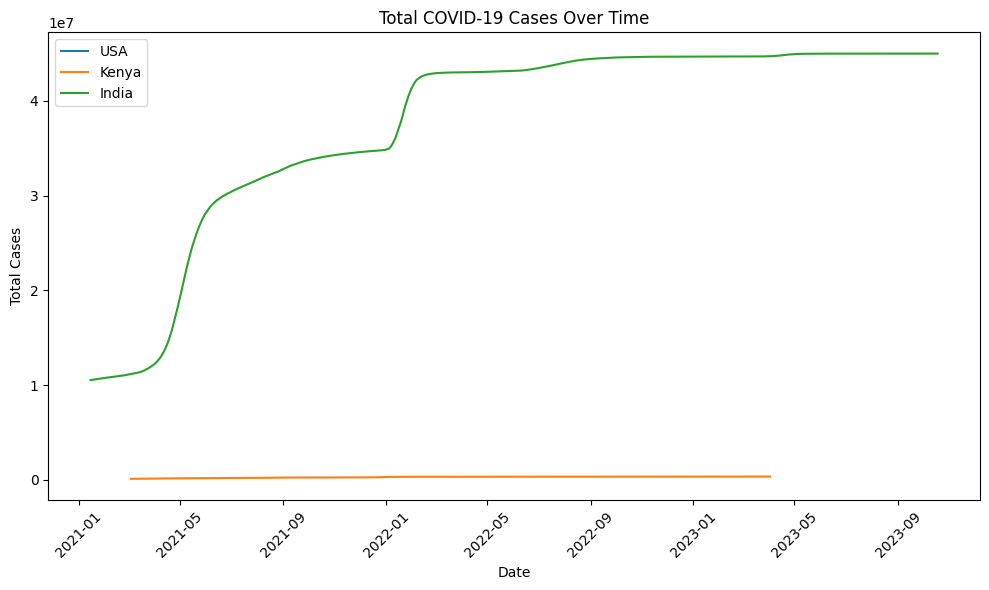

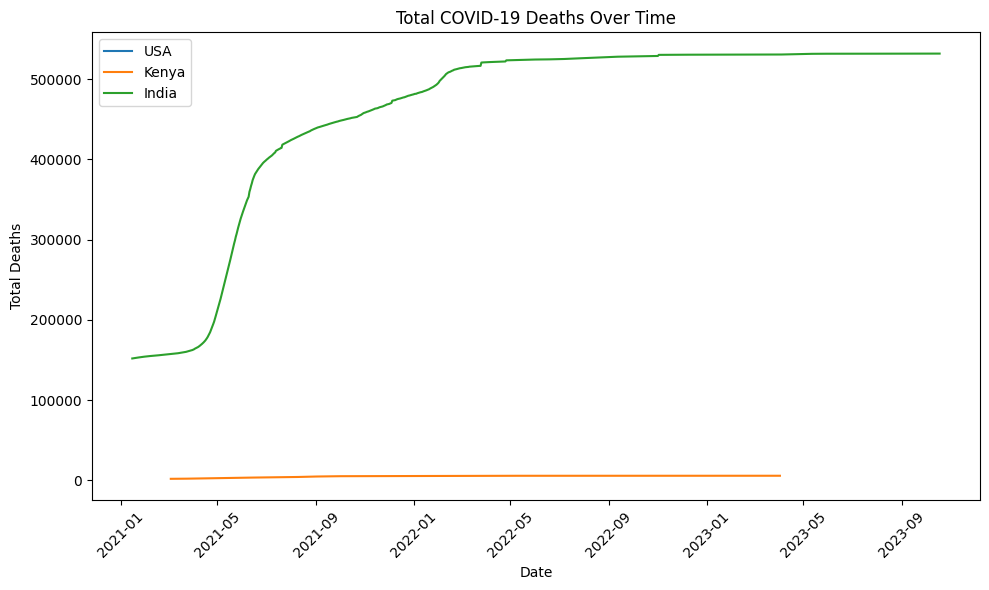

140151    0.014430
140152    0.014426
140153    0.014423
140154    0.014418
140155    0.014417
            ...   
158867    0.016615
158888    0.016607
158916    0.016592
158930    0.016589
158972    0.016584
Name: death_rate, Length: 1271, dtype: float64
       location       date  death_rate
140151    India 2021-01-15    0.014430
140152    India 2021-01-16    0.014426
140153    India 2021-01-17    0.014423
140154    India 2021-01-18    0.014418
140155    India 2021-01-19    0.014417


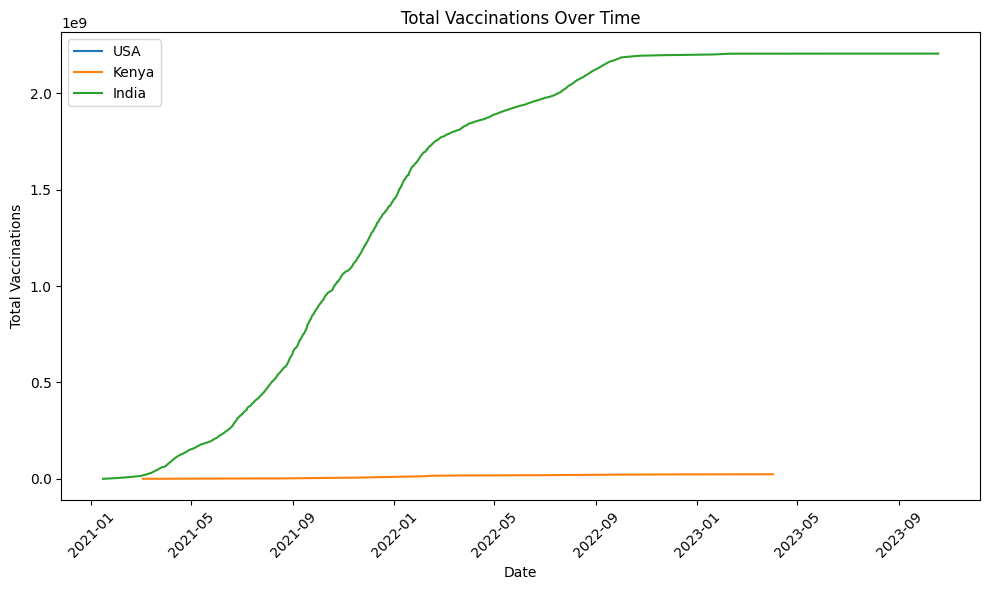

140151     0.000000
140152     0.013490
140153     0.015827
140154     0.032039
140155     0.047618
            ...    
158867    42.688531
158888    42.815483
158916    43.147545
158930    43.235976
158972    43.959906
Name: vaccination_rate, Length: 1271, dtype: float64


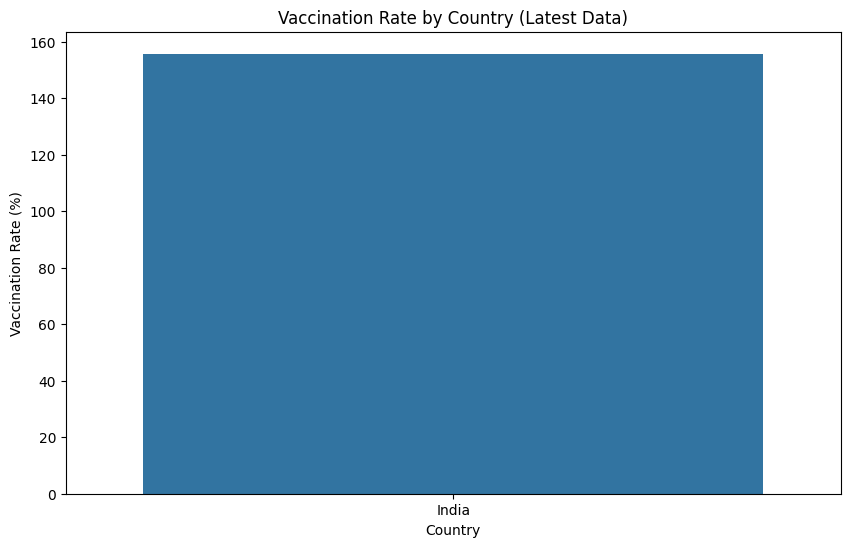

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering data for total cases over time
df_filtered_usa = df_filtered[df_filtered['location'] == 'USA']
df_filtered_kenya = df_filtered[df_filtered['location'] == 'Kenya']
df_filtered_india = df_filtered[df_filtered['location'] == 'India']

# Plot total cases over time
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_usa['date'], df_filtered_usa['total_cases'], label='USA')
plt.plot(df_filtered_kenya['date'], df_filtered_kenya['total_cases'], label='Kenya')
plt.plot(df_filtered_india['date'], df_filtered_india['total_cases'], label='India')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot total deaths over time
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_usa['date'], df_filtered_usa['total_deaths'], label='USA')
plt.plot(df_filtered_kenya['date'], df_filtered_kenya['total_deaths'], label='Kenya')
plt.plot(df_filtered_india['date'], df_filtered_india['total_deaths'], label='India')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculate the death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
print(df_filtered['death_rate'])

# View the data with the death rate column
df_filtered[['location', 'date', 'death_rate']].head()
print(df_filtered[['location', 'date', 'death_rate']].head())

# Plot cumulative vaccinations over time
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_usa['date'], df_filtered_usa['total_vaccinations'], label='USA')
plt.plot(df_filtered_kenya['date'], df_filtered_kenya['total_vaccinations'], label='Kenya')
plt.plot(df_filtered_india['date'], df_filtered_india['total_vaccinations'], label='India')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate percentage vaccinated
df_filtered['vaccination_rate'] = (df_filtered['total_vaccinations'] / df_filtered['population']) * 100
print(df_filtered['vaccination_rate'])

# Visualize vaccination rate for the countries
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='vaccination_rate', data=df_filtered[df_filtered['date'] == df_filtered['date'].max()])
plt.xlabel('Country')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rate by Country (Latest Data)')
plt.show()

import plotly.express as px

# Prepare data for the choropleth map
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
choropleth_data = latest_data[['iso_code', 'total_cases']]

# Create choropleth map
fig = px.choropleth(choropleth_data, 
                    locations='iso_code', 
                    color='total_cases', 
                    hover_name='iso_code', 
                    color_continuous_scale='Viridis', 
                    projection="natural earth",
                    title="GLOBAL COVID-19 TOTAL CASES")
fig.show()

Figures 

![Screenshot 2025-05-11 205809.png](<attachment:Screenshot 2025-05-11 205809.png>) ![Screenshot 2025-05-11 205840.png](<attachment:Screenshot 2025-05-11 205840.png>) ![Screenshot 2025-05-11 205855.png](<attachment:Screenshot 2025-05-11 205855.png>) ![Screenshot 2025-05-11 205909.png](<attachment:Screenshot 2025-05-11 205909.png>)
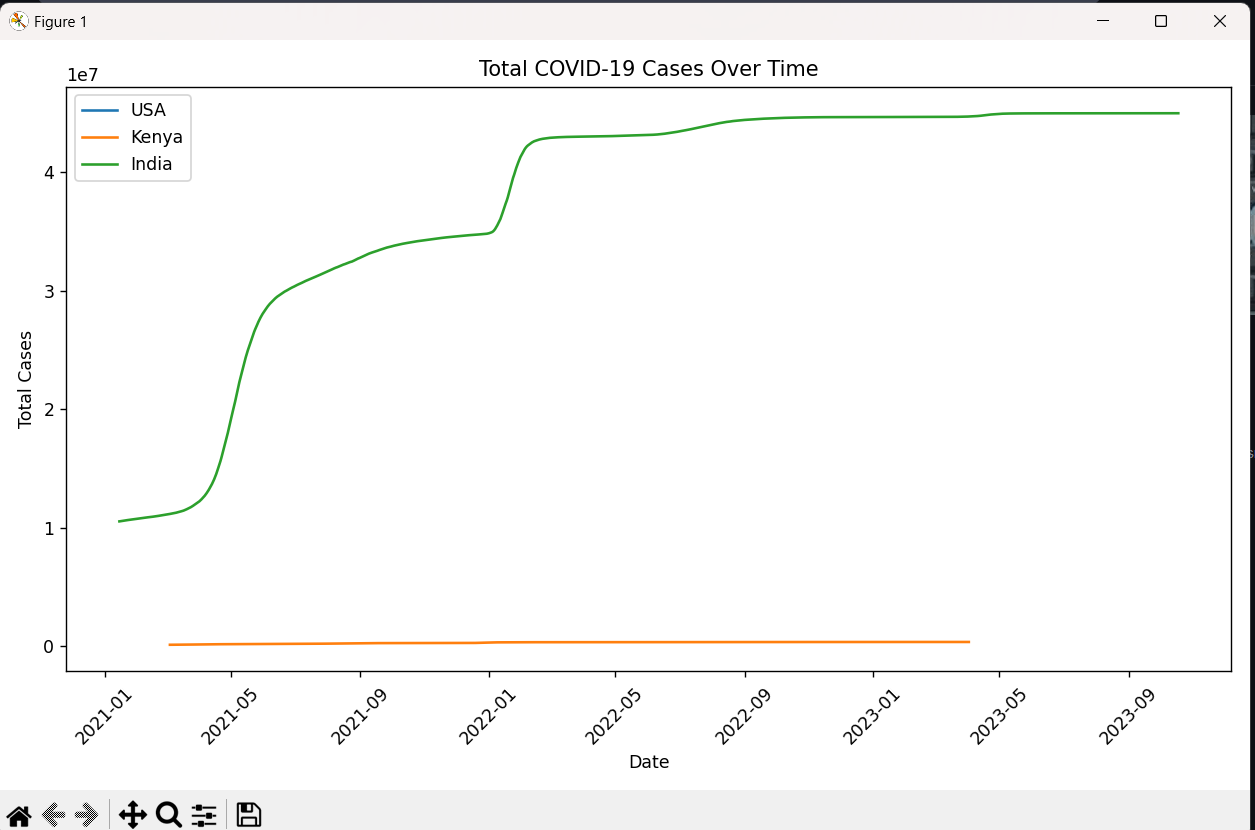
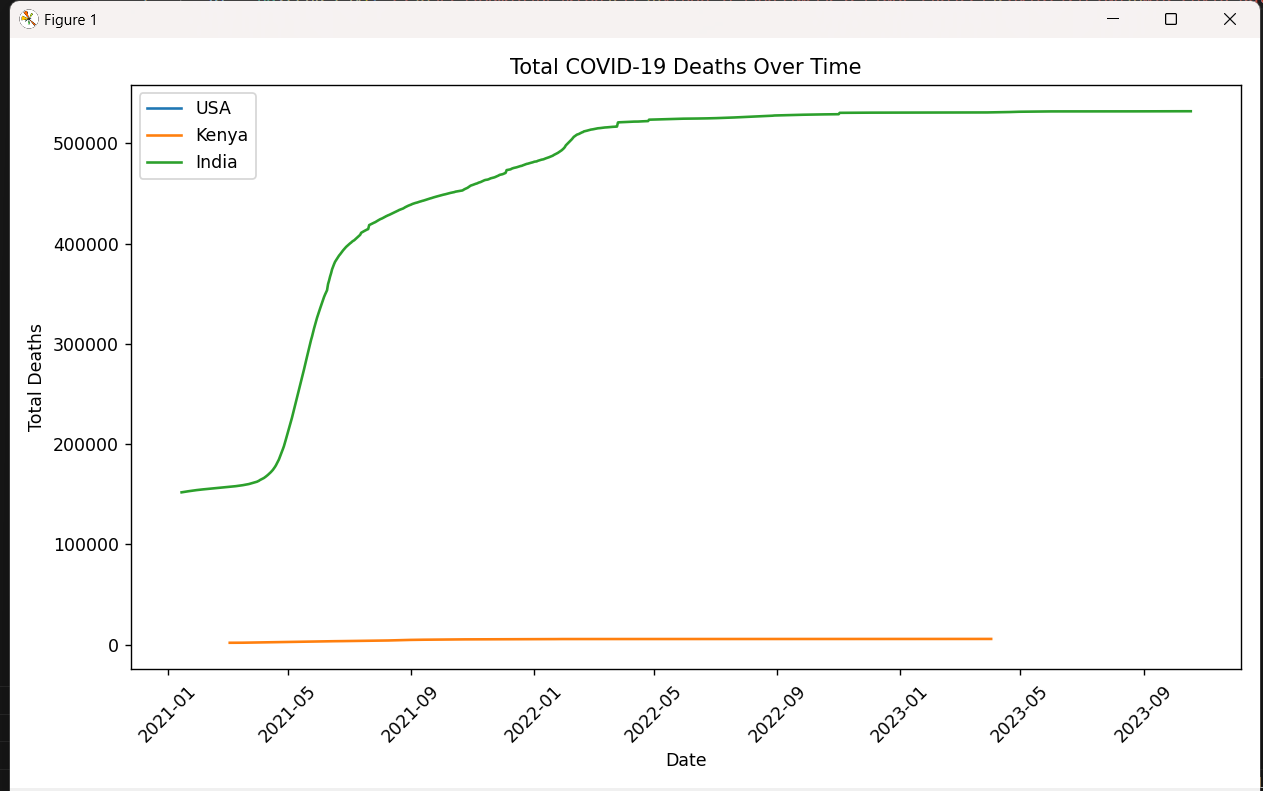
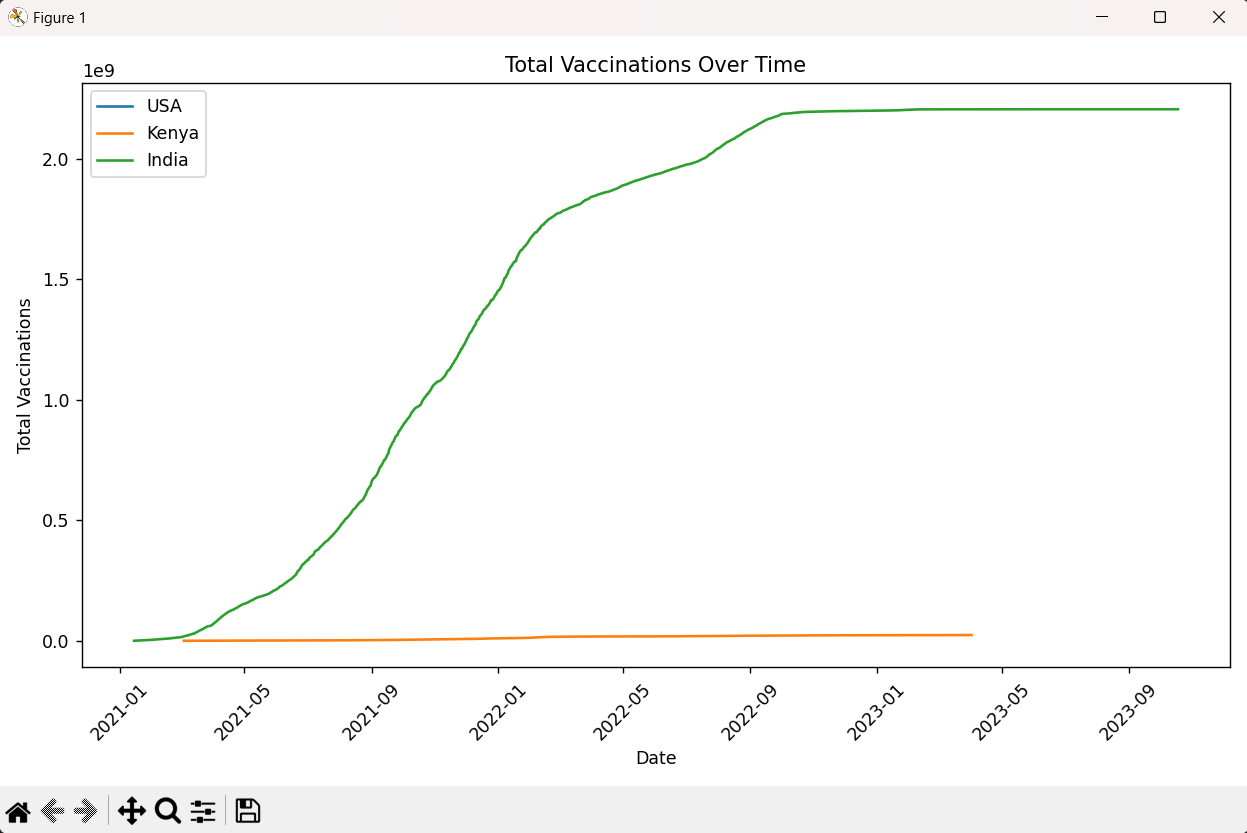
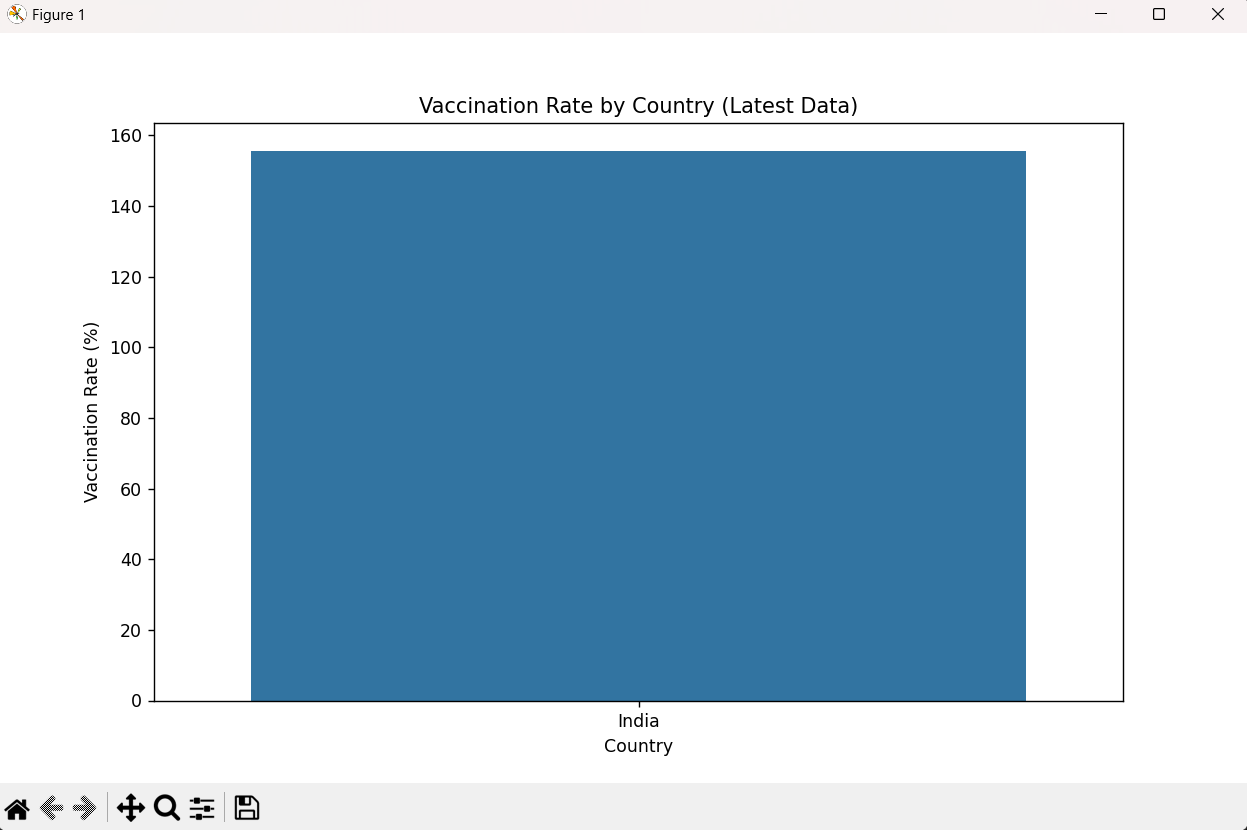